In [31]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import os
import numpy as np
import cv2

In [32]:
IMG_PATH = "/content/photo.jpg"

In [33]:
# read input image from your computer
img = read_image(IMG_PATH)

xmin_l = 660
ymin_l = 300
xmax_l = 1010
ymax_l = 555
#
xmin_u = 610
ymin_u = 620
xmax_u = 1010
ymax_u = 890

# xmin_l = 524
# ymin_l = 509
# xmax_l = 802
# ymax_l = 713
# #
# xmin_u = 570
# ymin_u = 291
# xmax_u = 786
# ymax_u = 454

# xmin_u = 367
# ymin_u = 347
# xmax_u = 850
# ymax_u = 673

# xmin_l = 457
# ymin_l = 813
# xmax_l = 758
# ymax_l = 1019


split_u1 = xmin_u + (xmax_u - xmin_u)//3
split_u2 = xmin_u + 2*(xmax_u - xmin_u)//3

split_l1 = xmin_l + (xmax_l - xmin_l)//3
split_l2 = xmin_l + 2*(xmax_l - xmin_l)//3

In [34]:
img = torchvision.transforms.ToPILImage()(img)
img = np.array(img)

ub_m_r = np.median(img[ymin_u:ymax_u,xmin_u:split_u1,0])

ub_m_g = np.median(img[ymin_u:ymax_u,xmin_u:split_u1,1])

ub_m_b = np.median(img[ymin_u:ymax_u,xmin_u:split_u1,2])



uw_m_r = np.median(img[ymin_u:ymax_u,split_u1:split_u2,0])

uw_m_g = np.median(img[ymin_u:ymax_u,split_u1:split_u2,1])

uw_m_b = np.median(img[ymin_u:ymax_u,split_u1:split_u2,2])



ug_m_r = np.median(img[ymin_u:ymax_u,split_u2:xmax_u,0])

ug_m_g = np.median(img[ymin_u:ymax_u,split_u2:xmax_u,1])

ug_m_b = np.median(img[ymin_u:ymax_u,split_u2:xmax_u,2])



lb_m_r = np.median(img[ymin_l:ymax_l,xmin_l:split_l1,0])

lb_m_g = np.median(img[ymin_l:ymax_l,xmin_l:split_l1,1])

lb_m_b = np.median(img[ymin_l:ymax_l,xmin_l:split_l1,2])



lw_m_r = np.median(img[ymin_l:ymax_l,split_l1:split_l2,0])

lw_m_g = np.median(img[ymin_l:ymax_l,split_l1:split_l2,1])

lw_m_b = np.median(img[ymin_l:ymax_l,split_l1:split_l2,2])



lg_m_r = np.median(img[ymin_l:ymax_l,split_l2:xmax_l,0])

lg_m_g = np.median(img[ymin_l:ymax_l,split_l2:xmax_l,1])

lg_m_b = np.median(img[ymin_l:ymax_l,split_l2:xmax_l,2])

#
#ub_m_r = np.mean(img[ymin_u:ymax_u,xmin_u:split_u1,0])
#ub_m_g = np.mean(img[ymin_u:ymax_u,xmin_u:split_u1,1])
#ub_m_b = np.mean(img[ymin_u:ymax_u,xmin_u:split_u1,2])
#
#uw_m_r = np.mean(img[ymin_u:ymax_u,split_u1:split_u2,0])
#uw_m_g = np.mean(img[ymin_u:ymax_u,split_u1:split_u2,1])
#uw_m_b = np.mean(img[ymin_u:ymax_u,split_u1:split_u2,2])
#
#ug_m_r = np.mean(img[ymin_u:ymax_u,split_u2:xmax_u,0])
#ug_m_g = np.mean(img[ymin_u:ymax_u,split_u2:xmax_u,1])
#ug_m_b = np.mean(img[ymin_u:ymax_u,split_u2:xmax_u,2])
#
#lb_m_r = np.mean(img[ymin_l:ymax_l,xmin_l:split_l1,0])
#lb_m_g = np.mean(img[ymin_l:ymax_l,xmin_l:split_l1,1])
#lb_m_b = np.mean(img[ymin_l:ymax_l,xmin_l:split_l1,2])
#
#lw_m_r = np.mean(img[ymin_l:ymax_l,split_l1:split_l2,0])
#lw_m_g = np.mean(img[ymin_l:ymax_l,split_l1:split_l2,1])
#lw_m_b = np.mean(img[ymin_l:ymax_l,split_l1:split_l2,2])
#
#lg_m_r = np.mean(img[ymin_l:ymax_l,split_l2:xmax_l,0])
#lg_m_g = np.mean(img[ymin_l:ymax_l,split_l2:xmax_l,1])
#lg_m_b = np.mean(img[ymin_l:ymax_l,split_l2:xmax_l,2])
##

In [35]:
W1 = np.array([uw_m_r, uw_m_g, uw_m_b]) # Upper White Area [R G B]

W2 = np.array([lw_m_r, lw_m_g, lw_m_b]) # Lower White Area [R G B]



G1 = np.array([ug_m_r, ug_m_g, ug_m_b]) # Upper Gray Area [R G B]

G2 = np.array([lg_m_r, lg_m_g, lg_m_b]) # Lower Gray Area [R G B]



B1 = np.array([ub_m_r, ub_m_g, ub_m_b]) # Upper Black Area [R G B]

B2 = np.array([lb_m_r, lb_m_g, lb_m_b]) # Lower Black Area [R G B]



depth = np.array([-5 , -15]) # Depths of upper and lower plates


Secchi_coefficients = np.array([11.97, -0.7899])

Turbidity_coefficients = np.array([1.32, -1.39])

TSM_coefficients = np.array([1.2333, 0.6602])   #NOT YET CALIBRATED

CDOM_coefficients = np.array([5.2564, -6.1705]) #NOT YET CALIBRATED

In [36]:
# Black area correction

C1 = (W1-B1)/G1 # Upper Level

C2 = (W2-B2)/G2 # Lower Level

# Attenuation
p = np.polyfit(depth, np.log([C1[0], C2[0]]), 1)

K_R = p[0]*100 # Attenuation for Red

p = np.polyfit(depth, np.log([C1[1], C2[1]]), 1)

K_G = p[0]*100 # Attenuation for Green

p = np.polyfit(depth, np.log([C1[2], C2[2]]), 1)

K_B = p[0]*100 # Attenuation for Blue

<ipython-input-36-e3eabe21bde1>:12: RuntimeWarning: invalid value encountered in log
  p = np.polyfit(depth, np.log([C1[1], C2[1]]), 1)
<ipython-input-36-e3eabe21bde1>:16: RuntimeWarning: invalid value encountered in log
  p = np.polyfit(depth, np.log([C1[2], C2[2]]), 1)


In [40]:
print(C1)
print(B1)
print(W1)
print(G1)

[0.37837838 0.225      0.17      ]
[ 96. 187. 188.]
[138. 232. 222.]
[111. 200. 200.]


In [41]:
print(C2)
print(W2)
print(G2)
print(B2)

[ 0.06666667 -0.00568182 -0.02762431]
[ 96. 178. 179.]
[ 90. 176. 181.]
[ 90. 179. 184.]


In [37]:
K_mean_RG = np.round(np.mean([K_R, K_G]),2) # Mean of red and green attenuations

SD = np.round((Secchi_coefficients[0]/K_mean_RG) + Secchi_coefficients[1],2) # Secchi Depth

Turb = np.round(Turbidity_coefficients[0]*K_R + Turbidity_coefficients[1],2) # Turbidity

cdom_ratio = K_B/K_R

CDOM = CDOM_coefficients[0]*cdom_ratio + CDOM_coefficients[1] #Absorption by CDOM at 400 nm

TSM = TSM_coefficients[0]*K_R + TSM_coefficients[1] #Total suspended matter


In [38]:
print("K_mean_RG: ", K_mean_RG)
print("Secchi Depth: ", SD)
print("Turbidity: ", Turb)
print("cdom_ratio: ", cdom_ratio)
print("CDOM: ", CDOM)
print("Total Suspended Matter:", TSM)

K_mean_RG:  nan
Secchi Depth:  nan
Turbidity:  21.53
cdom_ratio:  nan
CDOM:  nan
Total Suspended Matter: 22.07262655969732


In [42]:
parameters = {'K_mean_RG':K_mean_RG,'SD':SD,'Turb':Turb,'cdom_ratio':cdom_ratio,'CDOM':CDOM,'TSM':TSM}
print(parameters)

{'K_mean_RG': nan, 'SD': nan, 'Turb': 21.53, 'cdom_ratio': nan, 'CDOM': nan, 'TSM': 22.07262655969732}


In [25]:
import json

with open("photo (2).json", "w") as outfile:
  json.dump(parameters, outfile)

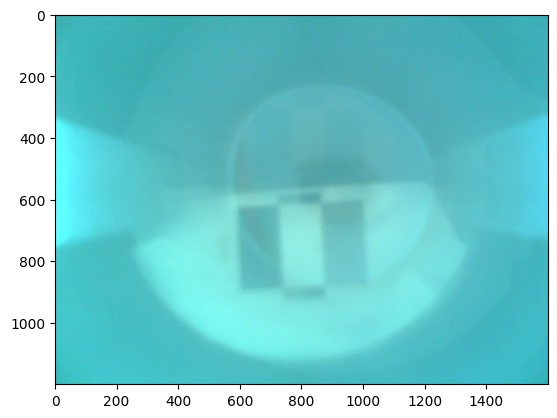

In [50]:
import matplotlib.pyplot as plt
im = cv2.imread(IMG_PATH)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [46]:
img = read_image(IMG_PATH)
#img1 = img[0]
#img2 = img[1]
#img3 = img[2]
#img4 = img[3]

upper_box = [xmin_u, ymin_u, xmax_u, ymax_u]
upper_box = torch.tensor(upper_box)
upper_box = upper_box.unsqueeze(0)

# draw bounding box and fill color
img = draw_bounding_boxes(img,upper_box,width=5,
                          colors="green",
                          fill=False)

lower_box = [xmin_l, ymin_l, xmax_l, ymax_l]
lower_box = torch.tensor(lower_box)
lower_box = lower_box.unsqueeze(0)

# draw bounding box and fill color
img = draw_bounding_boxes(img, lower_box, width=5,
                          colors="red",
                          fill=False)

ub = [xmin_u, ymin_u, split_u1, ymax_u]
ub = torch.tensor(ub)
ub = ub.unsqueeze(0)

uw = [split_u1, ymin_u, split_u2, ymax_u]
uw = torch.tensor(uw)
uw = uw.unsqueeze(0)

ug = [split_u2, ymin_u, xmax_u, ymax_u]
ug = torch.tensor(ug)
ug = ug.unsqueeze(0)

lb = [xmin_l, ymin_l, split_l1, ymax_l]
lb = torch.tensor(lb)
lb = lb.unsqueeze(0)

lw = [split_l1, ymin_l, split_l2, ymax_l]
lw = torch.tensor(lw)
lw = lw.unsqueeze(0)

lg = [split_l2, ymin_l, xmax_l, ymax_l]
lg = torch.tensor(lg)
lg = lg.unsqueeze(0)

img = draw_bounding_boxes(img, ub, width=5, colors="blue", fill=False)
img = draw_bounding_boxes(img, uw, width=5, colors="orange", fill=False)
img = draw_bounding_boxes(img, ug, width=5, colors="yellow", fill=False)
img = draw_bounding_boxes(img, lb, width=5, colors="pink", fill=False)
img = draw_bounding_boxes(img, lw, width=5, colors="purple", fill=False)
img = draw_bounding_boxes(img, lg, width=5, colors="brown", fill=False)

img = torchvision.transforms.ToPILImage()(img)
img.show()